In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from matplotlib.gridspec import GridSpec
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mark=np.array(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
color_list = color_list*2


In [3]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): eta = h_pd['h']/data_['A']
	else: eta = data_['h']/data_['A']
	if a==None: a,b=0,1
	E=0
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5):
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		E+=sum((a*t[i]+b)*N_t*phi_t)
	return E

def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

# $\phi$ vs age (Total age)

/tmp/ipykernel_3014183/1264464357.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)
/tmp/ipykernel_3014183/1264464357.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)
/tmp/ipykernel_3014183/1264464357.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)
/tmp/ipykernel_3014183/1264464357.py:33:

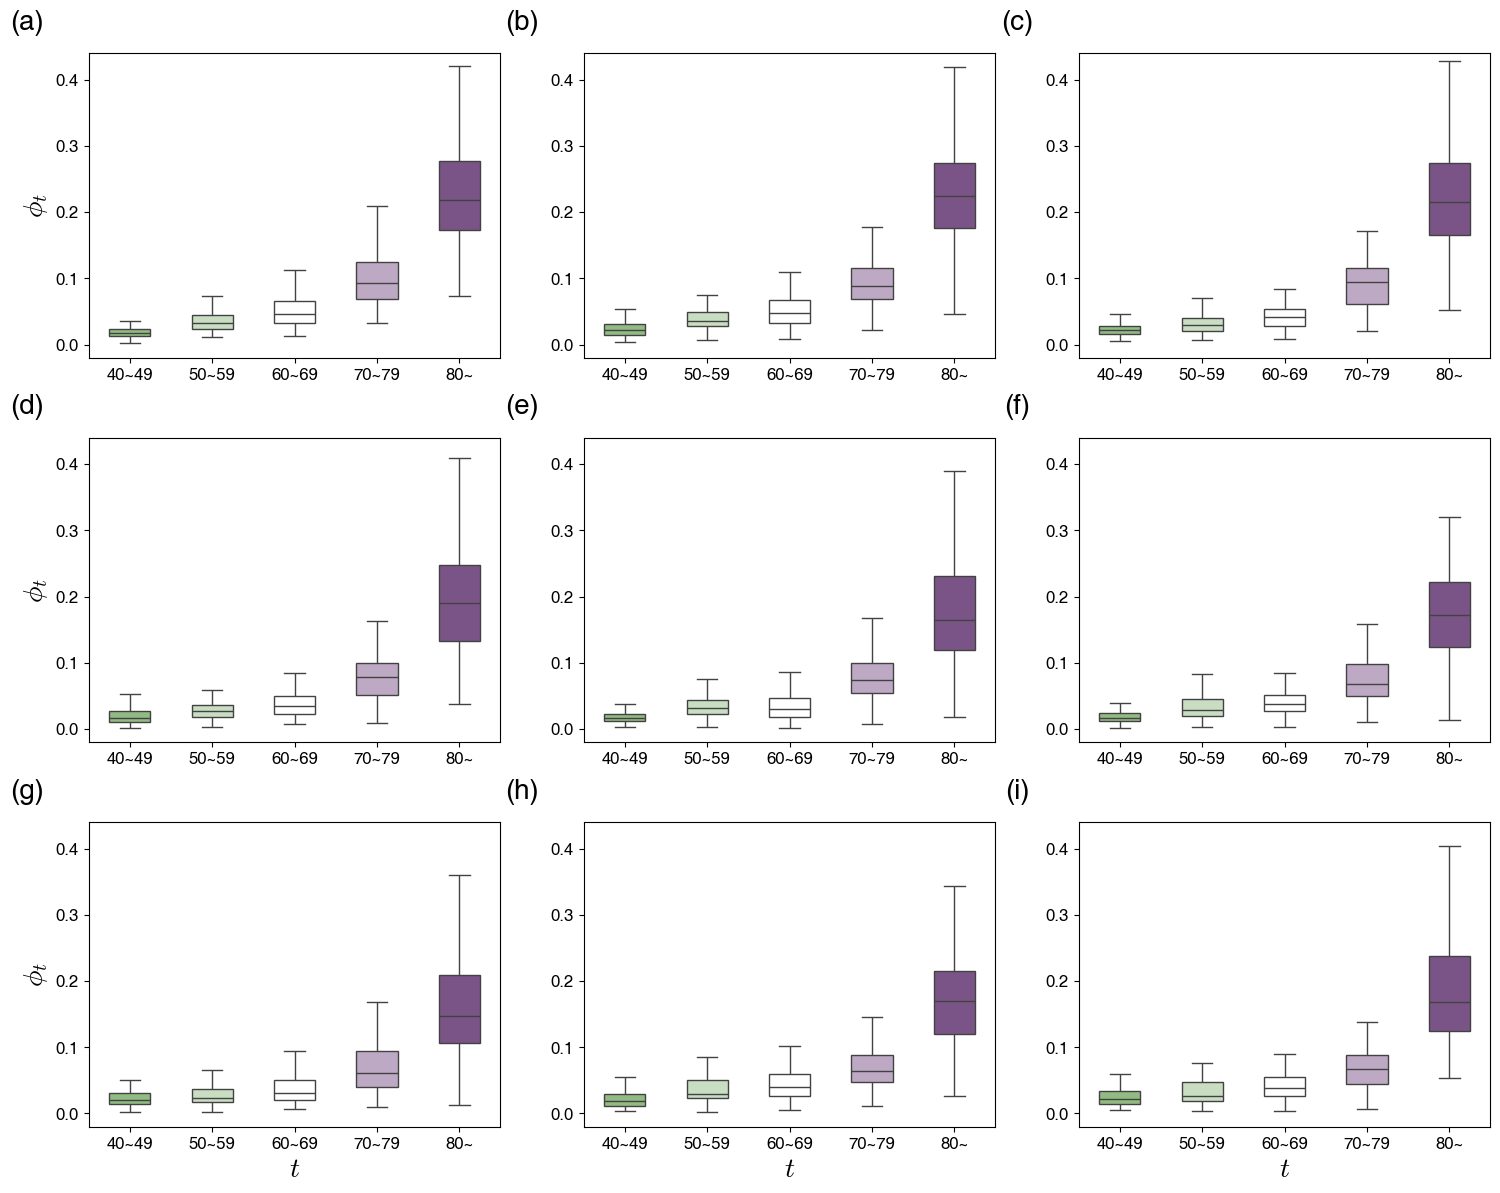

In [46]:
title_pos = [-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c = 0
Pcorr_list = []
Scorr_list = []
age_labels = ["40~49", "50~59", "60~69", "70~79", "80~"]
colors = ['#8ec579', '#c6e2bc', '#ffffff', '#c0a5c8', '#804b90']
for year in range(2014, 2023):
    path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
    data = pd.read_csv(path, sep=',')
    N = data.iloc[:, 6:15].copy().mul(data['N'], axis=0)
    D = data.iloc[:, 15:24].copy().mul(data['D'],axis=0)
    phi_df = D.iloc[:, :] / N.iloc[:, :].values
    phi_df.columns = phi_df.columns.str.slice(start=2)
    age_list = []
    age_label_list = []
    phi_list = []
    age_num_list = [45, 55, 65, 75, 85]
    for i in range(5):
        age_list+=[age_num_list[i]]*len(data)
        age_label_list+=[age_labels[i]]*len(data)
        phi_list+=list(phi_df[phi_df.columns[4:][i]])
    pcorr, p_value = pearsonr(age_list, phi_list)
    Pcorr_list.append(pcorr)
    scorr, p_value = spearmanr(age_list, phi_list)
    Scorr_list.append(scorr)

    ax = fig.add_subplot(gs[c // 3, c % 3])
    sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)  
    ax.set_ylim(-0.02, 0.44)
    if c >5:ax.set_xlabel(r'$t$',size=20)
    if c %3 == 0: ax.set_ylabel(r'$\phi_t$',size=20)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    ax.text(title_pos[0], title_pos[1], f'({title_list[c]})', fontsize=title_size,
            ha='center', va='center', transform=ax.transAxes)
    c += 1

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/phi_age.pdf', format='pdf', transparent=True)
plt.show()

In [47]:
len(data)

124

In [20]:
print(Pcorr_list)
print(Scorr_list)

[0.7610093415060851, 0.7126887134682108, 0.7376835937790616, 0.7192061029035656, 0.6250052089500502, 0.6982932996593235, 0.5246859353938139, 0.6944763436427299, 0.680574988958758]
[0.8938293548952577, 0.8357039491261445, 0.8366362441609888, 0.79262650883132, 0.7735090869049984, 0.7852925624125244, 0.7103179293583713, 0.7632563497079812, 0.7496188015274061]


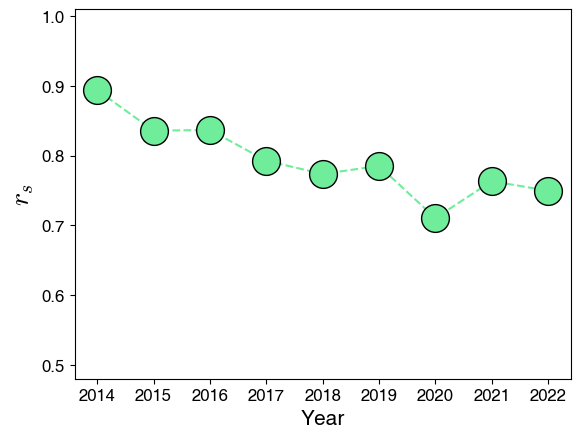

In [21]:
plt.plot(range(2014, 2023), Scorr_list, markersize=20, marker='o', linestyle='--', mec='k', c=color_list[5])
plt.ylim(.48, 1.01)
plt.xlabel('Year' ,size='15')
plt.ylabel(r'$r_s$' ,size='20')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

/tmp/ipykernel_1699773/3954992316.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=age_label_list, y=phi_list, width=0.5, showfliers=False, palette=colors, ax=ax)
/tmp/ipykernel_1699773/3954992316.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


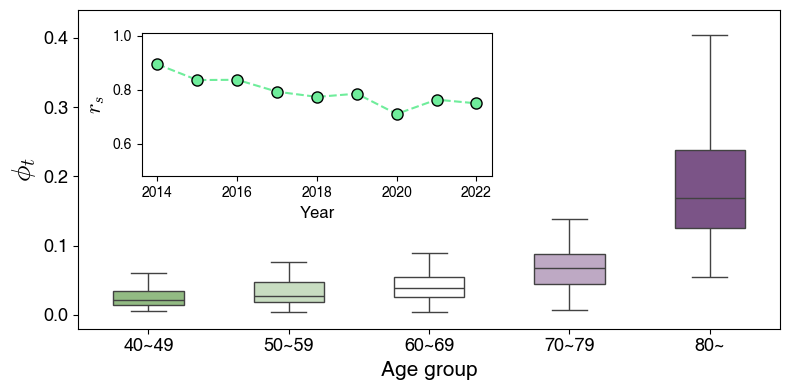

In [ ]:

# 데이터 로드
age_labels = ["40~49", "50~59", "60~69", "70~79", "80~"]
colors = ['#8ec579', '#c6e2bc', '#ffffff', '#c0a5c8', '#804b90']
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(2022)+'_40.txt'
data = pd.read_csv(path, sep=',')

# phi_df 계산
N = data.iloc[:, 6:15].copy().mul(data['N'], axis=0)
D = data.iloc[:, 15:24].copy().mul(data['D'], axis=0)
phi_df = D.iloc[:, :] / N.iloc[:, :].values
phi_df.columns = phi_df.columns.str.slice(start=2)

# 리스트 만들기
age_list = []
age_label_list = []
phi_list = []
age_num_list = [45, 55, 65, 75, 85]
for i in range(5):
    age_list += [age_num_list[i]] * len(data)
    age_label_list += [age_labels[i]] * len(data)
    phi_list += list(phi_df[phi_df.columns[4:][i]])

# 메인 플롯
fig, ax = plt.subplots(figsize=(8, 4))  # 가로로 긴 플롯
sns.boxplot(x=age_label_list, y=phi_list, width=0.5, showfliers=False, palette=colors, ax=ax)
ax.set_ylim(-0.02, 0.44)
ax.set_ylabel(r'$\phi_t$',size=20)
ax.set_xlabel(r'Age group',size=15)
ax.tick_params(axis='both', labelsize=13)

# 인셋 플롯 추가 (위치 조정 가능)
ax_inset = inset_axes(ax, width="50%", height="30%", bbox_to_anchor=(-0.4, -0.55, 1, 1.5), bbox_transform=ax.transAxes)  
ax_inset.plot(range(2014, 2023), Scorr_list, markersize=8, marker='o', linestyle='--', mec='k', c=color_list[5])
ax_inset.set_ylim(0.48, 1.01)
ax_inset.set_xlabel('Year', fontsize=12)
ax_inset.set_ylabel(r'$r_s$', fontsize=16)
ax_inset.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/age_phi_spearman.pdf',format='pdf',transparent=True)
plt.show()


# $\phi$ vs $\eta$

PearsonRResult(statistic=-0.32640202292054765, pvalue=6.936083281559917e-05)
PearsonRResult(statistic=-0.2500370378770834, pvalue=0.0026907836406063748)
PearsonRResult(statistic=-0.34704711713239783, pvalue=3.48407171591606e-05)
PearsonRResult(statistic=-0.3243233704701444, pvalue=6.900560639481408e-05)
PearsonRResult(statistic=0.01091864822337532, pvalue=0.8959332011699898)
PearsonRResult(statistic=-0.007326531603606024, pvalue=0.9353693668109694)
PearsonRResult(statistic=-0.07502080706287619, pvalue=0.4134620763021913)
PearsonRResult(statistic=0.11532003623712309, pvalue=0.22597768509791022)
PearsonRResult(statistic=-0.1086948970630005, pvalue=0.22948721469613712)


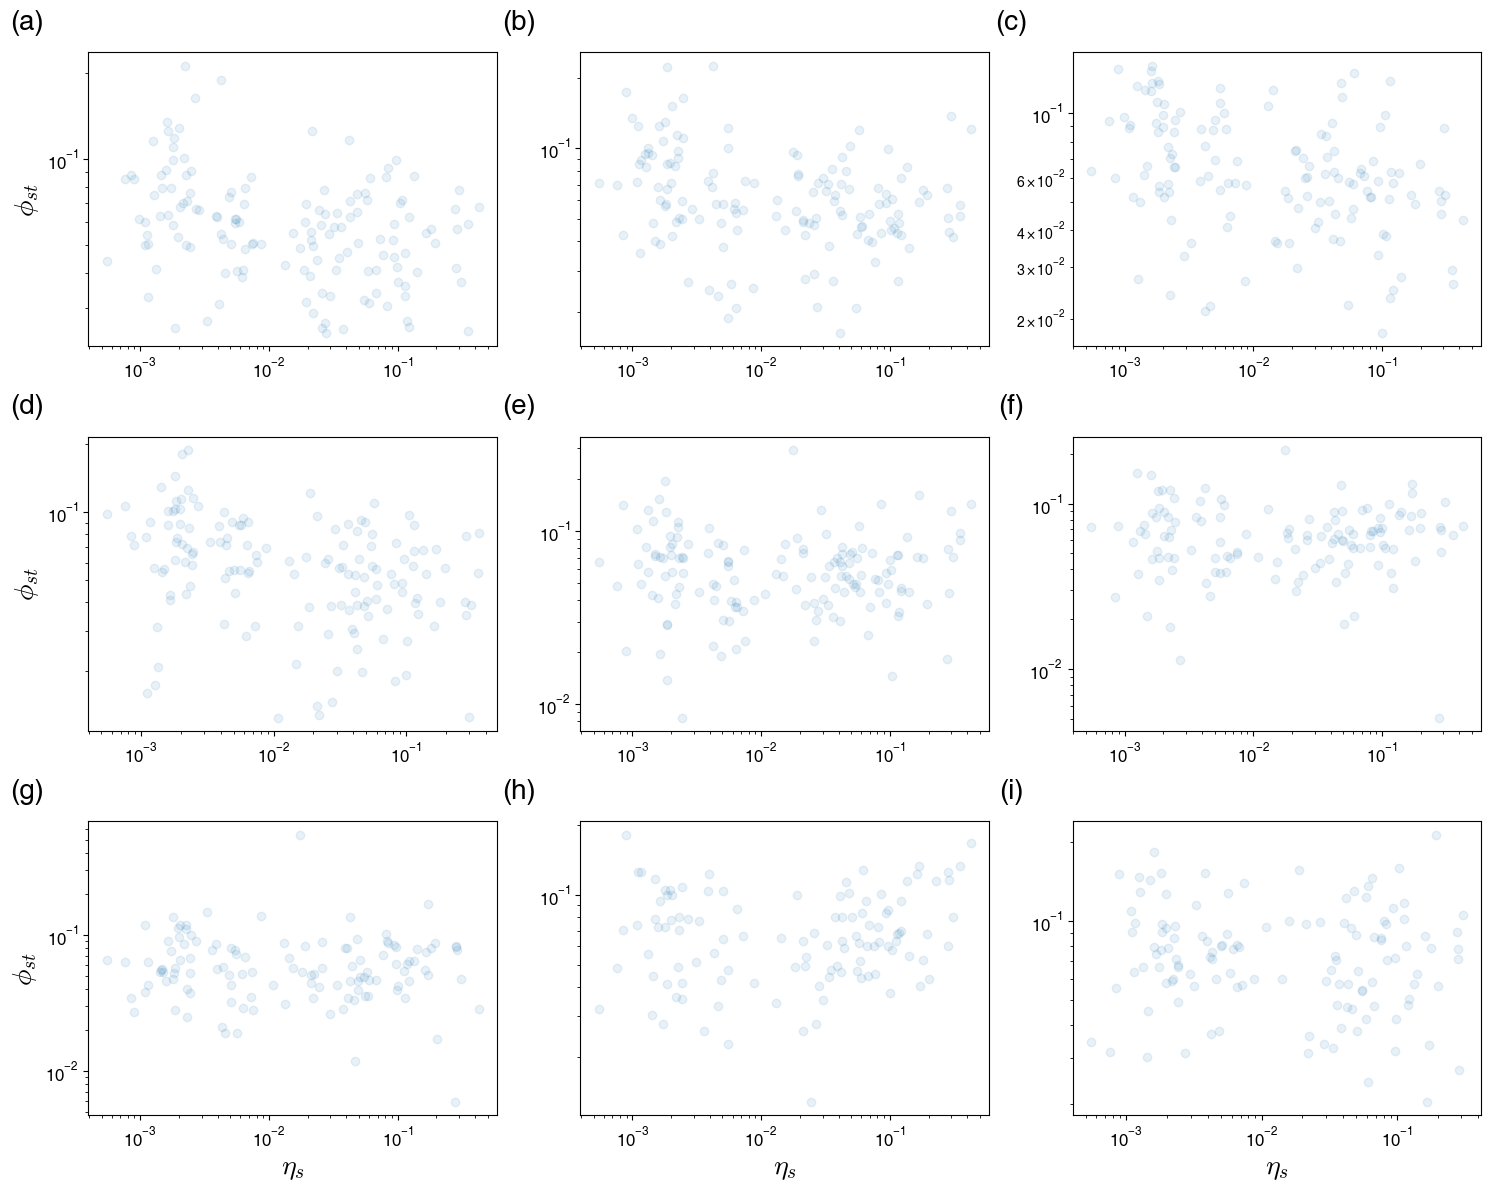

In [12]:
title_pos = [-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c = 0
Pcorr_list = []
Scorr_list = []
# age_labels = ["40~49", "50~59", "60~69", "70~79", "80~"]
colors = ['#8ec579', '#c6e2bc', '#ffffff', '#c0a5c8', '#804b90']
for year in range(2014, 2023):
    path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
    data = pd.read_csv(path, sep=',')
    N = data.iloc[:, 6:15].copy().mul(data['N'], axis=0)
    D = data.iloc[:, 15:24].copy().mul(data['D'],axis=0)
    eta = data['h'] / data['A']
    # phi_df = D.iloc[:, :] / N.iloc[:, :].values
    # phi_df.columns = phi_df.columns.str.slice(start=2)
    
    # phi_list = []
    # eta_list = []
    # for i in range(5)[1:2]:
    #     phi_list+=list(phi_df[phi_df.columns[4:][i]])
    #     eta_list+=list(eta)
    # pcorr, p_value = pearsonr(eta_list, phi_list)
    # Pcorr_list.append(pcorr)
    # scorr, p_value = spearmanr(eta_list, phi_list)
    # Scorr_list.append(scorr)

    ax = fig.add_subplot(gs[c // 3, c % 3])
    # sns.boxplot(x=age_label_list, y=phi_list, ax=ax, width=0.5, showfliers=False, palette=colors)  
    # ax.scatter(eta_list, phi_list, alpha=0.1)
    ax.scatter(eta, data['D']/data['N'], alpha=0.1)
    # ax.set_ylim(-0.02, 0.44)
    if c >5:ax.set_xlabel(r'$\eta_s$',size=20)
    if c %3 == 0: ax.set_ylabel(r'$\phi_{st}$',size=20)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    ax.text(title_pos[0], title_pos[1], f'({title_list[c]})', fontsize=title_size,
            ha='center', va='center', transform=ax.transAxes)
    print(pearsonr(np.log10(eta), np.log10(data['D']/data['N'])))
    c += 1

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/phi_age.pdf', format='pdf', transparent=True)
plt.show()

In [30]:
print(Pcorr_list)
print(Scorr_list)

[0.018247710349494364, 0.06434309573913617, -0.10051450079705804, 0.11973667225338622, 0.24590585618249772, 0.01523721310280398, 0.12215089618400027, 0.5284411305683198, 0.16843827837848657]
[0.04328577950845641, -0.03651577670157233, -0.08102199444449545, 0.08366398992284678, 0.18992257029634427, 0.012884792626728108, 0.35445181700452943, 0.37441994059081135, 0.1203904333446547]


# $E$ vs $a$

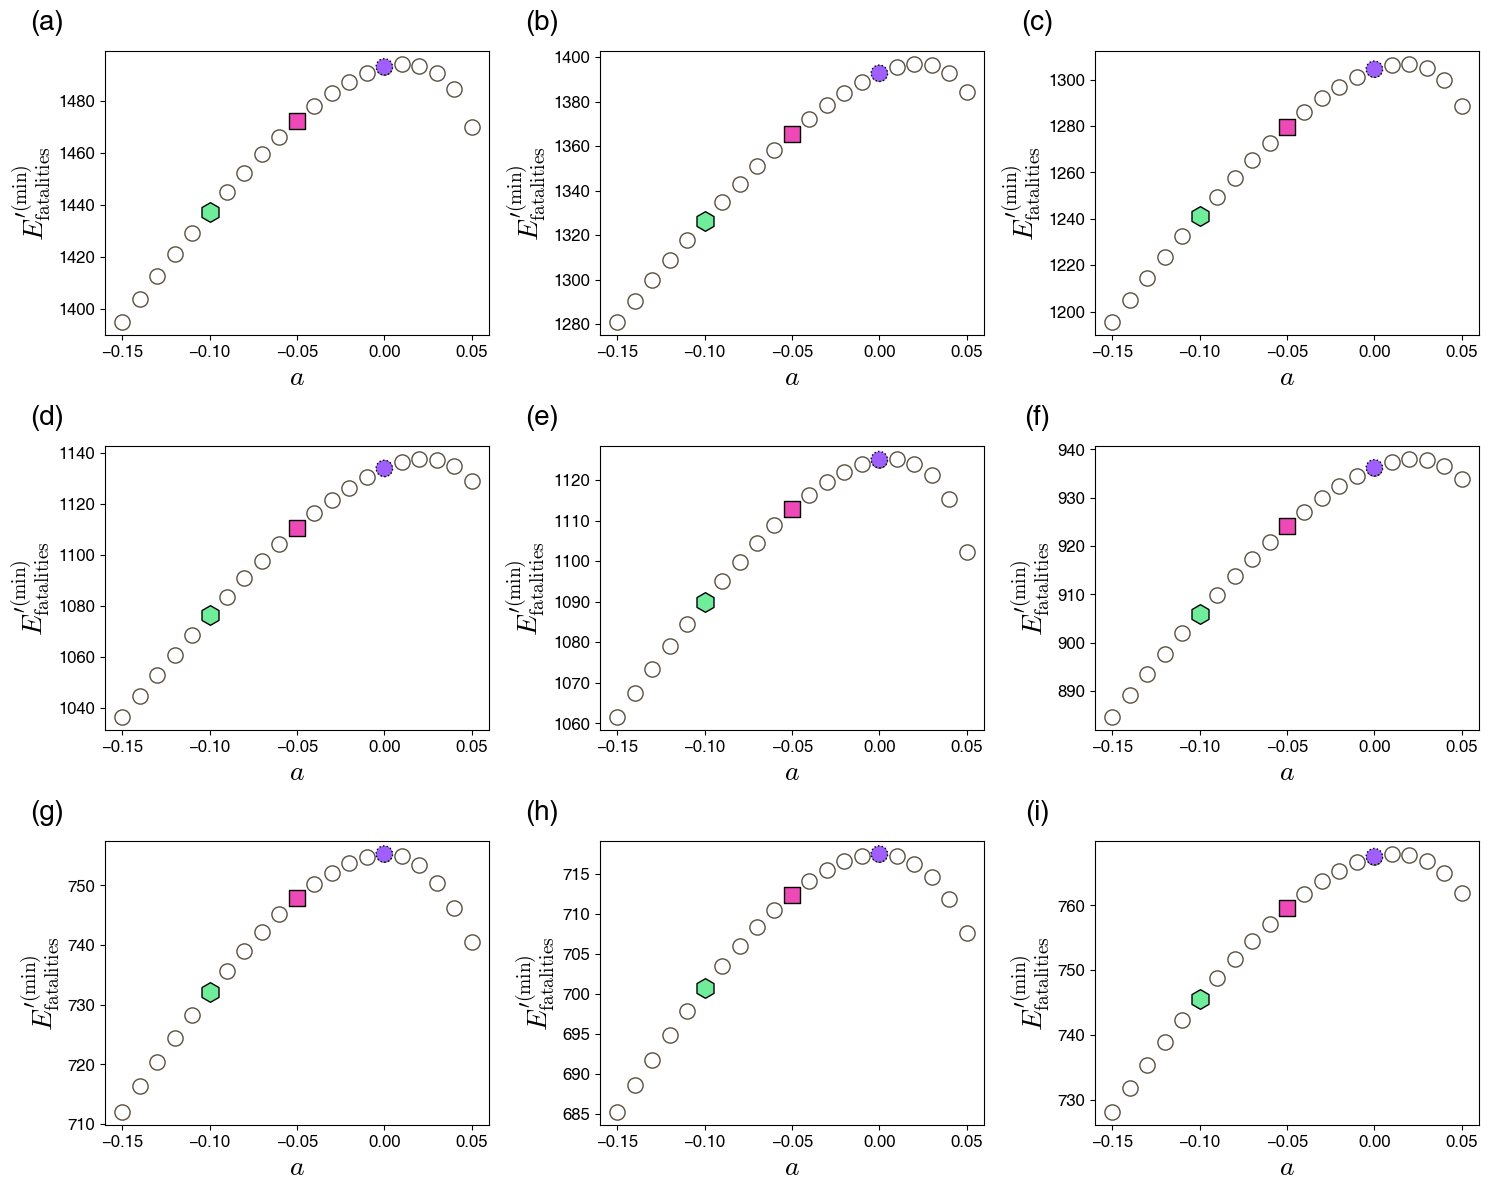

In [13]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']

save_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig)
c=0
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/dataframe_40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	for i in range(21):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		# h_opt = pd.read_csv(save_path+str(year)+'MC_age_h_opt_a_'+str(ai)+'.csv')
		# E_list.append(E(data, h_pd=h_opt))

		ai+=1
	ax = fig.add_subplot(gs[c//3, c%3])
	# ax.plot(np.linspace(-0.15,0.05,21), [E(data)]*21, 'r--')
	ax.scatter(np.linspace(-0.15,0.05,21), E_list, c='w', s=120, ec=rgb_to_hex(89,80,65)) #label=str(year)
	ax.scatter(np.linspace(-0.15,0.05,21)[15], E_list[15], marker='o', ec='k',s=140,c=rgb_to_hex(158,95,253),linestyle=':')
	ax.scatter(np.linspace(-0.15,0.05,21)[10], E_list[10], marker='s', ec='k',s=120,c=rgb_to_hex(237,74,184))
	ax.scatter(np.linspace(-0.15,0.05,21)[5], E_list[5], marker='h', ec='k',s=200,c=rgb_to_hex(111,237,155))
	# ax.set_ylim(500,2000)
	# ax.set_yscale('log')
	ax.set_xlabel(r'$a$',size=20)
	ax.set_ylabel(r'$E^{\prime\mathrm{(min)}}_\mathrm{fatalities}$',size=20)
	ax.tick_params(axis='x', labelsize=12)
	ax.tick_params(axis='y', labelsize=12)
	# ax.legend(fontsize='large')
	ax.text(title_pos[0], title_pos[1], '('+title_list[c]+')', fontsize=title_size,  ha='center', va='center',transform=ax.transAxes)
	c+=1
plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/E_a.pdf',format='pdf',transparent=True)

plt.show()

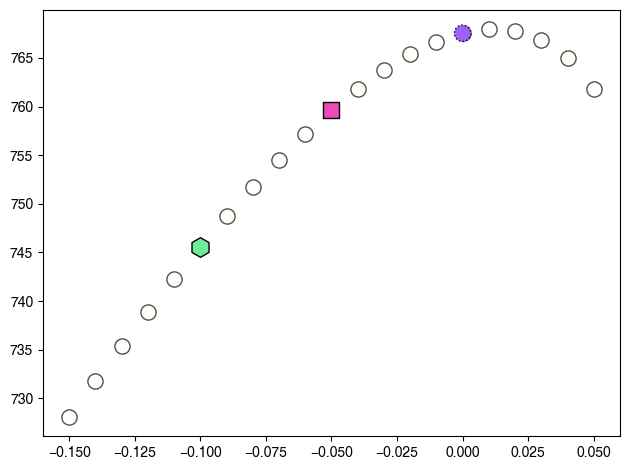

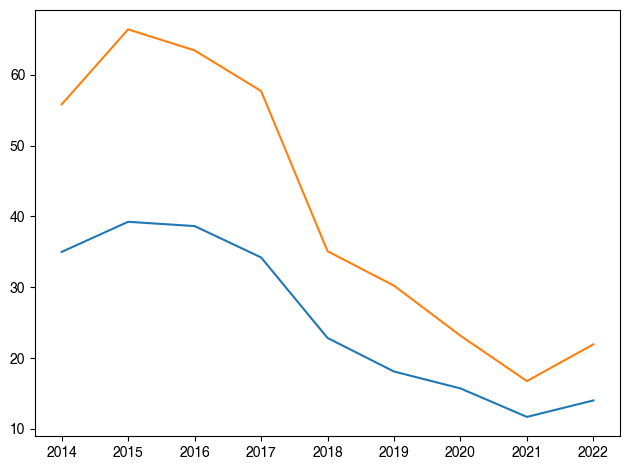

In [32]:
E_a0=[]
E_a005=[]
E_a01=[]
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/dataframe_40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	for i in range(21):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		ai+=1
	E_a0.append(E_list[5])
	E_a005.append(E_list[10])
	E_a01.append(E_list[15])

plt.scatter(np.linspace(-0.15,0.05,21), E_list, c='w', s=120, ec=rgb_to_hex(89,80,65)) #label=str(year)
plt.scatter(np.linspace(-0.15,0.05,21)[15], E_list[15], marker='o', ec='k',s=140,c=rgb_to_hex(158,95,253),linestyle=':')
plt.scatter(np.linspace(-0.15,0.05,21)[10], E_list[10], marker='s', ec='k',s=120,c=rgb_to_hex(237,74,184))
plt.scatter(np.linspace(-0.15,0.05,21)[5], E_list[5], marker='h', ec='k',s=200,c=rgb_to_hex(111,237,155))
plt.tight_layout()
plt.show()

# plt.plot(range(2014,2023), E_a0)
plt.plot(range(2014,2023), np.array(E_a005) - np.array(E_a0))
plt.plot(range(2014,2023), np.array(E_a01) - np.array(E_a0))
plt.tight_layout()
plt.show()

# Raw Data properties

## sido

In [27]:
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/'
fatality = pd.read_csv(path+'2014_2022_sido_10age_fatalities.txt',sep='\t')
patient = pd.read_csv(path+'2014_2022_sido_10age_patients.txt',sep='\t')
hospital =pd.read_csv(path+'2014_2022_sido_hospital.txt',sep='\t')

In [28]:
s='Busan'
sum(patient[patient['sido']==s]['2014'])

2548

In [29]:
len(fatality)/9

17.0

In [35]:
print(fatality.iloc[:, 2:].sum())
print(patient.iloc[:, 2:].sum())

2014    2136
2015    2018
2016    2020
2017    1678
2018    1657
2019    1492
2020    1222
2021    1324
2022    1223
dtype: int64
2014    34869
2015    32182
2016    30892
2017    28161
2018    26433
2019    23821
2020    19933
2021    18335
2022    16264
dtype: int64


In [31]:
print(hospital.iloc[:, 1:].sum())

2014    330
2015    334
2016    338
2017    343
2018    345
2019    353
2020    361
2021    363
2022    373
dtype: int64


In [34]:
for y in range(2014, 2023):
	data_sigungu = pd.read_csv(path+str(y)+'.txt',sep='\t')
	print(y,sum(data_sigungu['h']),  sum(data_sigungu['N']), sum(data_sigungu['D']))

2014 330 34798 2127
2015 335 32101 2016
2016 339 30789 2017
2017 344 28069 1671
2018 346 26334 1651
2019 354 23750 1486
2020 360 19840 1221
2021 364 18255 1319
2022 372 16208 1222


In [55]:
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/'
for y in range(2014, 2023):
	data_sigungu = pd.read_csv(path[:-9]+'data_over40/'+str(y)+'_40.txt',sep=',')
	print(y, len(data_sigungu),sum(data_sigungu['h']),  sum(data_sigungu['N']), sum(data_sigungu['D']))

2014 143 328 29886 1718
2015 142 322 26849 1635
2016 136 316 24876 1558
2017 145 335 23727 1351
2018 146 340 22159 1310
2019 125 306 17584 1088
2020 121 291 14978 878
2021 112 264 12383 838
2022 124 314 11841 886


In [25]:
year = '2022'
sidolist = list(hospital['sido'])# sido = 'Sejong'
data_sigungu = pd.read_csv(path+year+'.txt',sep='\t')
for sido in sidolist:
	sigungu_data = sum(data_sigungu[data_sigungu['#sido']==sido]['N'])
	sido_data= sum(patient[patient['sido']==sido][year])
	print(sido)
	print('sido: ', sido_data)
	print('sigungu: ', sigungu_data)

Seoul
sido:  2756
sigungu:  2756
Busan
sido:  1038
sigungu:  1038
Daegu
sido:  787
sigungu:  787
Incheon
sido:  827
sigungu:  827
Gwangju
sido:  352
sigungu:  352
Daejeon
sido:  368
sigungu:  368
Ulsan
sido:  290
sigungu:  290
Sejong
sido:  56
sigungu:  0
Gyeonggi
sido:  3626
sigungu:  3626
Gangwon
sido:  704
sigungu:  704
Chungbuk
sido:  498
sigungu:  498
Chungnam
sido:  842
sigungu:  842
Jeonbuk
sido:  653
sigungu:  653
Jeonnam
sido:  917
sigungu:  917
Gyeongbuk
sido:  1315
sigungu:  1315
Gyeongnam
sido:  1039
sigungu:  1039
Jeju
sido:  196
sigungu:  196


In [ ]:
labelsize=20
ticksize=14
# Create the figure with gridspec
fig = plt.figure(figsize=(11, 8))
# Adjusting width_ratios and height_ratios
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])  # Reduce width for the first column

#00
ax00 = plt.subplot(gs[0,0])
si_list=list(df['sido'])
for c in range(16):
    ax00.plot(range(2014,2023),h_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax00.set_ylabel('$h$',size=labelsize)
ax00.tick_params(axis='y', labelsize=ticksize)
# ax00.tick_params(axis='x', labelsize=12, rotation=60)
ax00.set_xticks([])
ax00.text(title_pos[0], title_pos[1], '(a)', fontsize=20,  ha='center', va='center',transform=ax00.transAxes)

#10
ax10=plt.subplot(gs[0,1])
for c in range(16):
    ax10.plot(range(2014,2023),N_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax10.set_ylabel('$N$',size=labelsize)
ax10.tick_params(axis='y', labelsize=ticksize)
# ax10.tick_params(axis='x', labelsize=12, rotation=60)
ax10.set_xticks([])
ax10.text(title_pos[0], title_pos[1], '(b)', fontsize=20,  ha='center', va='center',transform=ax10.transAxes)

#20
ax20=plt.subplot(gs[1,0])
for c in range(16):
    ax20.plot(range(2014,2023),D_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax20.text(title_pos[0], title_pos[1], '(c)', fontsize=20,  ha='center', va='center',transform=ax20.transAxes)
ax20.set_ylabel('$D$',size=labelsize)
ax20.tick_params(axis='y', labelsize=ticksize)
ax20.tick_params(axis='x',labelsize=ticksize,rotation=60)

#30
ax30=plt.subplot(gs[1,1])
for c in range(16):
    ax30.plot(range(2014,2023),phi_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax30.text(title_pos[0], title_pos[1], '(d)', fontsize=20,  ha='center', va='center',transform=ax30.transAxes)
ax30.set_ylabel('$\phi$',size=labelsize)
ax30.tick_params(axis='y', labelsize=ticksize)
ax30.tick_params(axis='x',labelsize=ticksize,rotation=60)
ax30.legend(loc=(1.03,-0))
# ax30.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4)


plt.tight_layout()
# plt.savefig('article_fig/hNDphi_sido_year.pdf', dpi=300,format='pdf', transparent=True)
plt.show()

# $a=-0.1$

In [64]:
year = 2014
data_path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
h_01_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_5.csv'
h_00_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_15.csv'
data = pd.read_csv(data_path, sep=',')
h_01=pd.read_csv(h_01_path)
h_00=pd.read_csv(h_00_path)
a_01=-0.1
b_01 = b(data, a_01)
E_01 = E(data, h_01, a_01, b_01)
E_00 = E(data, h_00, 0, 1)

In [65]:
E_01

1437.172969297703

In [66]:
E_00

1492.9885009732614

# Map figure

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import stats
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from matplotlib.colors import LinearSegmentedColormap, Normalize

# colors_p = [rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),'#BD66A7','#BD66A7','#BDBDBD','#2D7811']
colors_p = ['#BD66A7','#BDBDBD','#2D7811']
cmap_p = LinearSegmentedColormap.from_list('my_cmap', colors_p, gamma=1)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

In [ ]:
mark=np.array(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
color_list = color_list*2

In [40]:
# geopandas 맵 데이터 불러오기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 현상
# plt.rcParams['font.family'] = 'NamuBaraunGothic' # 한글폰트 전역 설정
path = '/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/'
kr_sgg = gpd.read_file(path+'korea_map/korea_sigungu/',encoding='cp949')
# kr_sido = kr_sido.drop(7)
kr_sgg = kr_sgg.reset_index()

In [43]:
colors_age = ['#8EC579', '#FFFFFF','#804B90']
cmap_age = LinearSegmentedColormap.from_list('my_cmap', colors_age, gamma=1)
age_data = pd.read_csv(path+'average_age_2022.csv',sep=',')

data_list = []
for cd in kr_sgg['SIG_CD']:
    if cd == '28170': # 미추홀
        cd='28177'
        data_list.append(list(age_data[age_data['SIG_CD'] == int(cd)*10**5]['average_age'])[0])
    elif cd == '36110':data_list.append(38.1)
    else:
        data_list.append(list(age_data[age_data['SIG_CD'] == int(cd)*10**5]['average_age'])[0])
kr_sgg['age']=data_list
norm_age=Normalize(vmin=37, vmax=59)

/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/tmp/ipykernel_3014183/3331825853.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


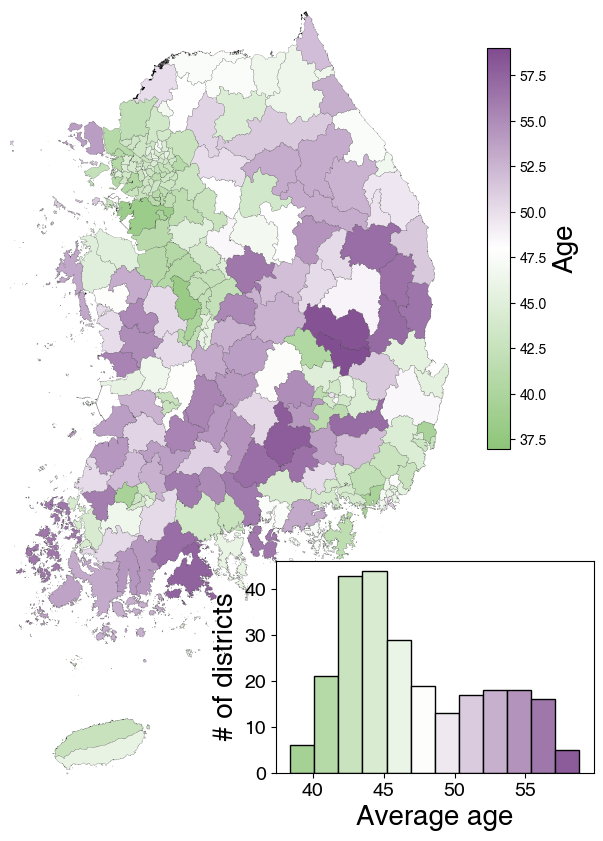

In [45]:
# Figure 및 gridspec 생성
fig, ax = plt.subplots(figsize=(5, 8))

# 지도 그림 그리기
kr_sgg.plot(column='age', ec='k', cmap=cmap_age, legend=False, norm=norm_age, vmin=38, vmax=59, alpha=1, linewidth=0.1, ax=ax)
ax.set_xlim(0.84e6, 1.2e6)
ax.set_ylim(1.46e6, 2.07e6)
ax.axis('off')

# Colorbar 생성 (위로 올리기)
cbar_ax = inset_axes(ax, width='5%', height='40%', loc='upper left', bbox_to_anchor=(1.05, -0.35, 1, 1.3), bbox_transform=ax.transAxes, borderpad=0)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm_age, cmap=cmap_age), cax=cbar_ax)
cbar.set_label('Age', fontsize=20)

# 인셋 플롯 생성 (크기 키우기)
inset_ax = inset_axes(ax, width='50%', height='25%', loc='lower right',bbox_to_anchor=(-0.1, 0,1.4,1.1), bbox_transform=ax.transAxes)
# inset_ax.hist(age_data['average_age'],bins=12, ec='k', color='#804B90')
# inset_ax.hist(age_data['average_age'],bins=12, ec='#804B90', color='#8EC579')

counts, bins, patches = inset_ax.hist(age_data['average_age'], bins=12, ec='k')
# 각 막대의 색상 설정
for count, patch in zip(counts, patches):
    color = cmap_age(norm_age(patch.get_x() + patch.get_width() / 2))
    patch.set_facecolor(color)

inset_ax.set_xlabel('Average age', size=20)
inset_ax.set_ylabel('# of districts', size=20)
inset_ax.tick_params(axis='x', labelsize=14)
inset_ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/age_map.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

# Raw data properties (sido)

In [10]:
h_array=np.zeros([9,17])
N_array=np.zeros([9,17])
D_array=np.zeros([9,17])


h_data=pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/2014_2022_sido_hospital.txt',sep='\t')
N_data=pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/2014_2022_sido_10age_patients.txt',sep='\t')
D_data=pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/2014_2022_sido_10age_fatalities.txt',sep='\t')
for y in range(2014,2023):
    year=str(y)#'2014'  
    h_array[y-2014]=h_data[year]
    N_array[y-2014]= N_data.groupby('sido', sort=False).sum()[year]
    D_array[y-2014]= D_data.groupby('sido', sort=False).sum()[year]

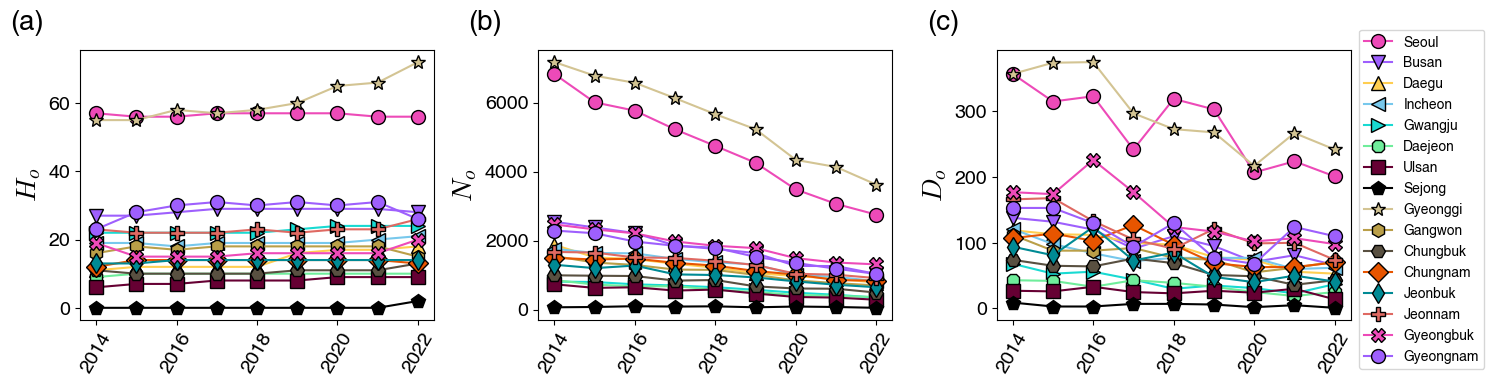

In [ ]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']
labelsize=20
ticksize=14
# Create the figure with gridspec
fig = plt.figure(figsize=(15, 4))
# Adjusting width_ratios and height_ratios
gs = GridSpec(1, 3, width_ratios=[5, 5, 5], height_ratios=[1])  # Reduce width for the first column

#00
ax00 = plt.subplot(gs[0,0])
si_list=list(h_data['sido'])
for c in range(16):
    ax00.plot(range(2014,2023),h_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax00.set_ylabel('$H_o$',size=labelsize)
ax00.tick_params(axis='y', labelsize=ticksize)
ax00.tick_params(axis='x', labelsize=ticksize, rotation=60)
# ax00.set_xticks([])
ax00.text(title_pos[0], title_pos[1], '(a)', fontsize=20,  ha='center', va='center',transform=ax00.transAxes)

#10
ax10=plt.subplot(gs[0,1])
for c in range(16):
    ax10.plot(range(2014,2023),N_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax10.set_ylabel('$N_o$',size=labelsize)
ax10.tick_params(axis='y', labelsize=ticksize)
ax10.tick_params(axis='x', labelsize=ticksize, rotation=60)
# ax10.set_xticks([])
ax10.text(title_pos[0], title_pos[1], '(b)', fontsize=20,  ha='center', va='center',transform=ax10.transAxes)

#20
ax20=plt.subplot(gs[0,2])
for c in range(16):
    ax20.plot(range(2014,2023),D_array[:,c], marker=mark[c],c=color_list[c],mec='k',ms=10,label=si_list[c])
ax20.text(title_pos[0], title_pos[1], '(c)', fontsize=20,  ha='center', va='center',transform=ax20.transAxes)
ax20.set_ylabel('$D_o$',size=labelsize)
ax20.tick_params(axis='y', labelsize=ticksize)
ax20.tick_params(axis='x',labelsize=ticksize,rotation=60)
ax20.legend(loc=(1.03,-0))
ax20.legend(loc='upper center', bbox_to_anchor=(1.2, 1.1), ncol=1)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/hND_sido_year.pdf', format='pdf', transparent=True)
plt.show()

In [5]:
D_data

,sido,age,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Seoul,0_9,0,0,0,0,0,0,0,0,0
1,Seoul,10_19,0,0,0,0,0,0,0,0,0
2,Seoul,20_29,1,2,1,1,1,0,1,1,0
3,Seoul,30_39,9,6,8,4,0,2,1,1,0
4,Seoul,40_49,22,20,20,14,10,8,8,10,7
...,...,...,...,...,...,...,...,...,...,...,...
148,Jeju,40_49,1,1,0,1,0,0,2,0,1
149,Jeju,50_59,2,1,0,2,2,0,1,2,2
150,Jeju,60_69,4,1,1,2,0,2,1,2,1
151,Jeju,70_79,2,7,1,0,1,4,5,2,5


In [7]:
N_array[y-2014]= N_data.groupby('sido').sum()[year]

In [9]:
N_data.groupby('sido').sum()

,age,2014,2015,2016,2017,2018,2019,2020,2021,2022
sido,,,,,,,,,,
Busan,0_910_1920_2930_3940_4950_5960_6970_7980_,2548,2386,2221,1861,1764,1642,1270,1266,1038
Chungbuk,0_910_1920_2930_3940_4950_5960_6970_7980_,998,986,977,844,862,677,616,609,498
Chungnam,0_910_1920_2930_3940_4950_5960_6970_7980_,1506,1455,1483,1359,1278,1122,1019,860,842
Daegu,0_910_1920_2930_3940_4950_5960_6970_7980_,1881,1518,1466,1333,1219,1061,977,898,787
Daejeon,0_910_1920_2930_3940_4950_5960_6970_7980_,859,730,677,681,583,515,426,404,368
Gangwon,0_910_1920_2930_3940_4950_5960_6970_7980_,1555,1368,1298,1165,1154,1010,850,771,704
Gwangju,0_910_1920_2930_3940_4950_5960_6970_7980_,817,803,737,703,653,578,493,434,352
Gyeongbuk,0_910_1920_2930_3940_4950_5960_6970_7980_,2472,2329,2214,1978,1854,1786,1495,1368,1315
Gyeonggi,0_910_1920_2930_3940_4950_5960_6970_7980_,7177,6782,6577,6130,5666,5231,4343,4137,3626


# Rate $N$ and $D$

In [21]:
RNRD_data = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/raw_data/2022_RNRD.txt', sep='\t')

In [22]:
RNRD_data

,sido,sigungu,h,A,N,D,RN0_9,RN10_19,RN20_29,RN30_39,...,RN80_,RD0_9,RD10_19,RD20_29,RD30_39,RD40_49,RD50_59,RD60_69,RD70_79,RD80_
0,Seoul,강남구,3,39.501308,71,6,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
1,Seoul,강동구,3,24.589280,126,6,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
2,Seoul,강북구,1,23.596920,98,12,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
3,Seoul,강서구,4,41.436729,167,12,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
4,Seoul,관악구,1,29.568727,152,5,0.000363,0.011248,0.057692,0.082729,...,0.201742,0.0,0.0,0.0,0.000000,0.034826,0.084577,0.129353,0.189055,0.562189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Gyeongnam,함안군,0,416.598222,37,5,0.001925,0.009625,0.034649,0.049086,...,0.262753,0.0,0.0,0.0,0.009091,0.009091,0.090909,0.109091,0.172727,0.609091
224,Gyeongnam,함양군,0,725.484452,19,3,0.001925,0.009625,0.034649,0.049086,...,0.262753,0.0,0.0,0.0,0.009091,0.009091,0.090909,0.109091,0.172727,0.609091
225,Gyeongnam,합천군,0,983.463996,29,6,0.001925,0.009625,0.034649,0.049086,...,0.262753,0.0,0.0,0.0,0.009091,0.009091,0.090909,0.109091,0.172727,0.609091
226,Jeju,제주시,5,978.426995,149,12,0.000000,0.015306,0.020408,0.086735,...,0.178571,0.0,0.0,0.0,0.000000,0.066667,0.133333,0.066667,0.333333,0.400000


In [66]:
cols = ['sido'] + [col for col in RNRD_data.columns if col.startswith('RN') or col.startswith('RD')]
RNRD = RNRD_data[cols].drop_duplicates(subset=['sido'], keep='first').reset_index(drop=True)
age_seq_data = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/age_sequence_2022.csv',sep=',')
age_list=['0~9', '10~19', '20~29', '30~39', '40~49', '50~59','60~69','70~79','80~']
sido_list = list(age_seq_data['sigungu'])
sido_list.remove('Sejong')

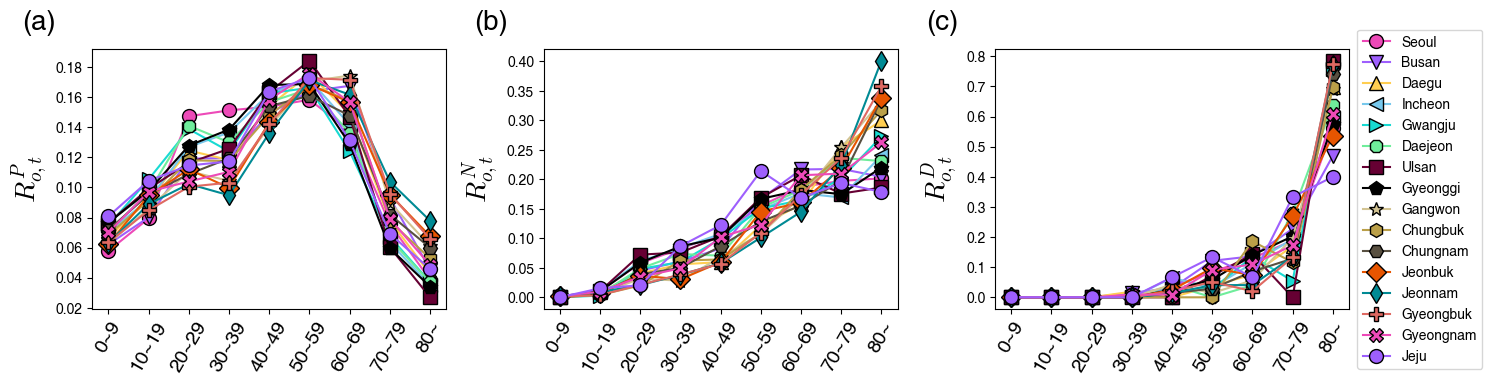

In [69]:
fig = plt.figure(figsize=(15, 4))
gs = GridSpec(1, 3, width_ratios=[1, 1, 1], height_ratios=[1])  
ax1 = plt.subplot(gs[0,0])
c=0
for l,e in age_seq_data.iloc[:,1:10].iterrows():
	if l!=7:
		ax1.plot(age_list, e/sum(e), marker=mark[c],c=color_list[c],mec='k',ms=10,label=sido_list[c])
		c+=1
ax1.set_ylabel(r'$R^P_{o,t}$',size=20)
ax1.tick_params(axis='x',labelsize=14,rotation=60)
ax1.text(title_pos[0], title_pos[1], '(a)', fontsize=20,  ha='center', va='center',transform=ax1.transAxes)

c=0
ax2 = plt.subplot(gs[0,1])
for l,e in RNRD.iloc[:,1:10].iterrows():
	ax2.plot(age_list, e, marker=mark[c],c=color_list[c],mec='k',ms=10,label=sido_list[c])
	c+=1
ax2.set_ylabel(r'$R^N_{o,t}$',size=20)
ax2.tick_params(axis='x',labelsize=14,rotation=60)
ax2.text(title_pos[0], title_pos[1], '(b)', fontsize=20,  ha='center', va='center',transform=ax2.transAxes)

c=0
ax3 = plt.subplot(gs[0,2])
for l,e in RNRD.iloc[:,10:20].iterrows():
	ax3.plot(age_list, e, marker=mark[c],c=color_list[c],mec='k',ms=10,label=sido_list[c])
	c+=1
ax3.set_ylabel(r'$R^D_{o,t}$',size=20)
ax3.tick_params(axis='x',labelsize=14,rotation=60)
ax3.text(title_pos[0], title_pos[1], '(c)', fontsize=20,  ha='center', va='center',transform=ax3.transAxes)
ax3.legend(loc=(1.03,-0))
ax3.legend(loc='upper center', bbox_to_anchor=(1.2, 1.1), ncol=1)
plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/RPRNRD.pdf', format='pdf', transparent=True)
plt.show()
